# Polynomial Linear Regression

Polynomial Linear Regression Genel Formülü:

y = a + b1*x + b2*x^2 + b3*x^3 + b4*x^4 + ....... + bN*x^N


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# Veri setimizi pandas yardımıyla alıp dataframe nesnemiz olan df'in içine aktarıyoruz..
df = pd.read_csv("polynomial.csv",sep = ";")






In [2]:
df

,deneyim,maas
0,1,4500
1,2,5000
2,3,6000
3,4,8000
4,5,11000
5,6,15000
6,7,20000
7,8,30000
8,9,50000
9,10,100000


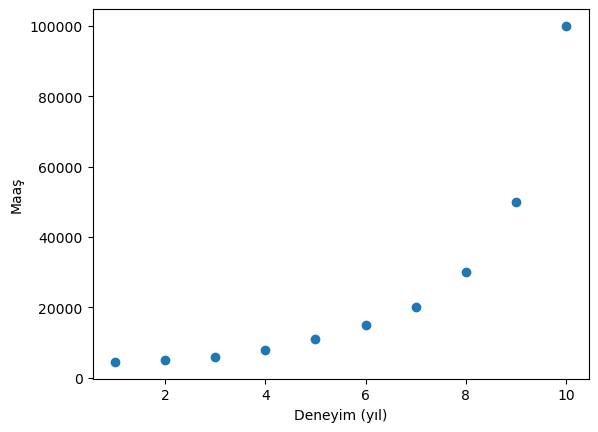

In [3]:

# Veri setimize bir bakalım
plt.scatter(df['deneyim'],df['maas'])
plt.xlabel('Deneyim (yıl)')
plt.ylabel('Maaş')
plt.savefig('1.png', dpi=300)
plt.show()

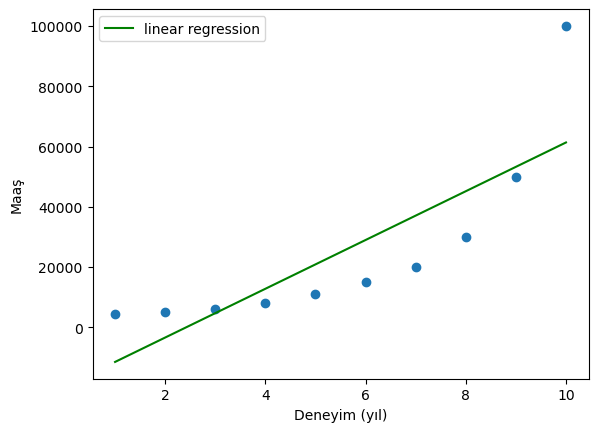

In [4]:
# Görüldüğü gibi doğrusal bir yapıda dağılmıyor veriler
# Eğer biz bu veri setine linear regression uygularsak hiç uygun olmayan bir tahmin çizigisi görürüz:
#? eğitme kısmı burada yapılıyor

reg = LinearRegression()
reg.fit(df[['deneyim']],df['maas'])

plt.xlabel('Deneyim (yıl)')
plt.ylabel('Maaş')

plt.scatter(df['deneyim'],df['maas'])   

xekseni = df['deneyim']
yekseni = reg.predict(df[['deneyim']])
plt.plot(xekseni, yekseni,color= "green", label = "linear regression")
plt.legend()
plt.show()

#### Tahmin için çok kötü bir doğru, demek ki neymiş: Bu veri seti için lineer regresyon uygulamak doğru değilmiş. Unutmayın veri setinize göre model seçeceksiniz arkadaşlar ! Öncelikle veri setinize çok iyi hakim olmalı ve bilmelisiniz !!!



### Bu veri seti için regression çeşitlerinden polynomial regression uygulanması gerektiğine kara verdik. Şimdi nasıl uyguladığımıza bakalım:


x değerimizi polinom yukardaki fonksiyonuna uyacak şekilde uyarlanmasını sağlıyoruz


Yani => 1, x, x^2 (N=2) şeklinde

In [13]:
# bir adet polynomial regression nesnesi oluşturması için PolynomialFeatures fonksiyonunu çağırıyoruz
# Bu fonksiyonu çağırırken polinomun derecesini (N) belirtiyoruz:
polynomial_regression = PolynomialFeatures(degree = 4)
#? derece arttıkça daha iyi sonuçlar ortaya çıkabilir

x_polynomial = polynomial_regression.fit_transform(df[['deneyim']])



In [15]:
# regression model nesnemizi olan reg nesnemizi oluşturup bunun fit metonu çağırarak x_polynomial ve y eksenlerini fit ediyor
# yani regresyon modelimizi mevcut gerçek verilerle eğitiyoruz:
reg = LinearRegression()
reg.fit(x_polynomial,df['maas'])



LinearRegression()

### Artık modelimiz hazır ve eğitilmiş, şimdi eldeki verilere göre modelimiz nasıl bir sonuç grafiği oluşturuyor onu görelim:

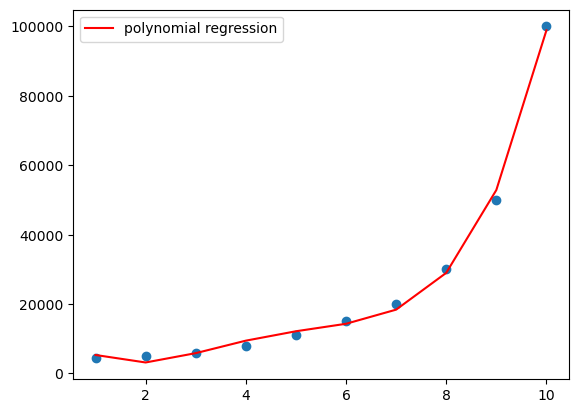

In [16]:
y_head = reg.predict(x_polynomial)
plt.plot(df['deneyim'],y_head,color= "red",label = "polynomial regression")
#plt.plot(xekseni, yekseni,color= "green", label = "linear regression")
plt.legend()

#veri setimizi de noktlaı olarak scatter edelim de görelim bakalım uymuş mu polynomial regression:
plt.scatter(df['deneyim'],df['maas'])   

plt.show()

Gördüğünüz gibi kesinlikle uymuş diyebiliriz, polynomial regression doğru bir seçim.
Şimdi bir de N=3 veya 4 yapıp görelim polinom derecesini artırdığımızda daha güzel fit edecek mi acaba?

In [ ]:
# ?  bazı durumlarda bu n i çok yüksek yapmak herzaman iyiy olmaz veri çok büyük ise program çok kasar 
# ? cpu çok yorulur

In [ ]:

x_polynomial1 = polynomial_regression.fit_transform([[4.5]])
reg.predict(x_polynomial1)

#### Alacağı maaş çok güzel bir şekilde şirket politikasına fit etmiş oluyor hakkı yenmeden ! :)